# Semantic Function Species

In [1]:
from scripts.imports import *

out = Exporter(
    paths['outdir'], 
    'semantics'
)

In [2]:
df.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'lex_str',
       'pdp_str', 'head_utf8', 'funct_type', 'function', 'quality', 'name',
       'text', 'n_times', 'n_slots', 'lex_token', 'is_advb', 'tense', 'firstw',
       'genre', 'domain', 'gendom', 'clause', 'sentence', 'cl_rela', 'cl_type',
       'cl_kind', 'verb', 'verb_etcbc', 'verb_utf8', 'verb_text', 'verbform',
       'verb_stem', 'cl_args', 'has_objc', 'has_cmpl', 'has_subj', 'has_oc',
       'Time Position', 'cl_type2', 'cl_nsuccs', 'cl_clust50', 'cl_clust10',
       'verbtense', 'vt_order', 'PP', 'unmodified', 'modtag', 'modtag2',
       'front', 'ph_type', 'has_time', 'notes', 'main_genre', 'APPO', 'DEF',
       'ORDN', 'ØPP', 'GP', 'QUANT', 'PL', 'NUM', 'PARA', 'DEMON',
       'demon_type', 'ADJV', 'TIMEAPPO', 'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1',
       'reg_group', 'SFX2', 'ADVB', 'CARDC'],
      dtype='object')

In [3]:
df.shape

(3648, 81)

# ! TODO ! : Clean these up!

* Check on KL HJWM and equivalents; Haspelmath suggests that 'every' be rendered as equivalent to "[in] every February"; I have tagged these as habituals; i.e. habital simultaneous—maybe that is right. But I should be sure. Also, where might KL indicate a duration instead?
* מתי look at this ehad with simul L; prob remove it
* todo: remove 472789 as this is emotive, not a location
* disambig one case of `atelic_ext, simultaneous` which shouldn't be there
* disambig one case of `habitual, multi_simul`
* change name of anterior_dist to dist_past + anterior
* change name of distfut_ext to dist_fut + atelic_ext

In [4]:
ALL_funct_cts = df.function.value_counts()

ALL_funct_cts

simultaneous                                 1882
atelic_ext                                    578
anterior_dur                                  449
posterior                                     224
reg_recur                                      80
posterior_dur                                  67
simultaneous_calendar                          65
begin_to_end                                   55
purposive_ext                                  34
anterior                                       32
simultaneous + atelic_ext                      23
multi_simuls                                   18
telic_ext                                      14
dist_fut                                        7
anterior_dur_past?                              7
dist_posterior                                  6
begin_to_end_habitual                           6
simul_to_end                                    6
habitual?                                       6
atelic_ext?                                     5


In [5]:
df[df.verse == 'Amos 1:1']['function']

node
486672    simultaneous + anterior_dist
Name: function, dtype: object

In [6]:
out.number(
    ALL_funct_cts.shape[0],
    'ALL_funct_unique',
)

'71'

In [7]:
out.text(
    '; '.join(ALL_funct_cts.index).replace('_', '\_'),
    'ALL_funct_tags',
)

'simultaneous; atelic\\_ext; anterior\\_dur; posterior; reg\\_recur; posterior\\_dur; simultaneous\\_calendar; begin\\_to\\_end; purposive\\_ext; anterior; simultaneous + atelic\\_ext; multi\\_simuls; telic\\_ext; dist\\_fut; anterior\\_dur\\_past?; dist\\_posterior; begin\\_to\\_end\\_habitual; simul\\_to\\_end; habitual?; atelic\\_ext?; dur\\_to\\_end; posterior + atelic\\_ext; anterior\\_limitive; atelic\\_ext + simultaneous; multi\\_antdur; anterior\\_limitive?; dist\\_past; regular\\_recurrence?; posterior + simultaneous; purposive\\_ext?; multi\\_posterior\\_dur; purposive; anterior\\_dur + duration; purposive?; habitual + begin\\_to\\_end; dist\\_prospective; simultaneous + posterior; perdurative?; anterior + distance; posterior\\_dur + begin\\_to\\_end + atelic\\_ext; begin\\_to\\_end + multi\\_antdur; anterior + posterior; simultaneous + purposive\\_ext; simultaneous + multi\\_begin\\_to\\_end; posterior, posterior\\_dur; dur\\_subj?; anterior?; atelic\\_ext, simultaneous; ant

In [8]:
out.number(
    ALL_funct_cts['dist_posterior'],
    'N_dist_posterior'
)

'6'

In [9]:
df[df.function == 'dist_posterior']['verse']

node
457809    1 Sam 30:12
463357     1 Kgs 15:5
474066       Jer 2:32
492838       Ps 55:20
493817        Ps 74:2
505558      Esth 4:11
Name: verse, dtype: object

In [10]:
ts.show(
    df[df.function=='anterior_dur_past?']
, extra=['function'])

showing 7 of 7


## Count Function Types

In [11]:
functype_ct = df.funct_type.value_counts()
functype_pr = functype_ct / functype_ct.sum()
functype_cp = join_ct_pr(functype_ct, functype_pr)

out.table(
    functype_cp,
    'ALL_functype_cp',
    caption='Function Type Counts',
)

count percent
main        3336     91%
compound     221      6%
secondary     52      1%
ambiguous     39      1%

## Main Function Analysis

In [12]:
df_main = df[df.funct_type=='main']

out.number(
    df_main.shape[0],
    'total_main_fc'
)

'3,336'

In [13]:
# get a freq count
funct_ct = df_main.function.value_counts(ascending=False)
funct_pr = (funct_ct / funct_ct.sum())
funct_pr_str = (funct_pr.round(2) * 100).astype(int).astype(str) + '%'
funct_vals = pd.concat([funct_ct, funct_pr_str], 1).T\
    .set_axis(['freq.', 'perc.'], 0)\

out.table(
    funct_vals,
    'funct_counts',
    caption='Frequencies of Primary Time Functions',
    adjustbox=True,
)

funct_vals

simultaneous atelic_ext anterior_dur posterior reg_recur posterior_dur  \
freq.         1882        578          449       224        80            67   
perc.          56%        17%          13%        7%        2%            2%   

      anterior telic_ext dist_fut dist_past  
freq.       32        14        7         3  
perc.       1%        0%       0%        0%

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
funct_pr.sort_values().mul(100).plot(kind='barh', ax=ax, edgecolor='black')
ax.set_xlabel('percent of main functions')
ax.grid(axis='x')
ax.set_axisbelow(True)
ax.set_xlim(0, 100)
out.plot(
    'bar_funct_perc',
)

In [15]:
top4_perc = 100*funct_pr.loc['simultaneous':'posterior'].sum()
out.number(
    top4_perc,
    'top4_perc',
)

'94'

In [16]:
# export numbers for each main
for funct in funct_vals.columns:
    Nfunct = funct_vals[funct]['freq.']
    Pfunct = funct_vals[funct]['perc.'].replace('%', '')
    out.number(Nfunct, f'N_{funct}')
    out.text(Pfunct, f'P_{funct}')

## All Functions Phrase Type

In [17]:
allf_pht_ct = df.ph_type.value_counts()
allf_pht_pr = allf_pht_ct / allf_pht_ct.sum()
allf_pht_cp = join_ct_pr(allf_pht_ct, allf_pht_pr)

out.table(
    allf_pht_cp,
    'allf_pht_cp',
    caption='Phrase Type Counts for All Functions',
)

count percent
PP     2190     60%
NP      913     25%
ADVB    545     15%

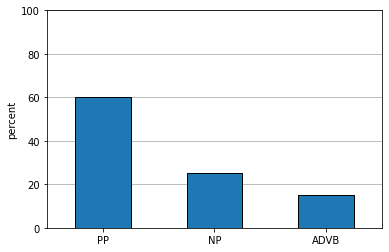

In [18]:
fig, ax = plt.subplots()
allf_pht_pr.mul(100).plot(kind='bar', edgecolor='black')
ax.set_ylabel('percent')
ax.set_ylim((0,100))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y')
ax.set_axisbelow(True)
out.plot(
    'bar_allfptype_pc',
)

## Phrase Type Associations by Function

In [19]:
funcpt_ct = pivot_ct(
    df_main,
    'function',
    'ph_type',
)

funcpt_pr = funcpt_ct.div(funcpt_ct.sum(1),0)

out.table(
    funcpt_ct,
    'funcpt_ct',
    caption='Phrase Type Counts by Function'
)

ph_type          PP   NP  ADVB
function                      
simultaneous   1131  293   458
atelic_ext        9  523    46
anterior_dur    449    0     0
posterior       190    0    34
reg_recur        61   19     0
posterior_dur    67    0     0
anterior         28    0     4
telic_ext         8    6     0
dist_fut          6    1     0
dist_past         0    3     0

In [20]:
out.table(
    funcpt_pr.mul(100).round().astype(int).astype(str)+'%',
    'funcpt_pr',
    caption='Phrase Type Percentages by Function'
)

ph_type          PP    NP ADVB
function                      
simultaneous    60%   16%  24%
atelic_ext       2%   90%   8%
anterior_dur   100%    0%   0%
posterior       85%    0%  15%
reg_recur       76%   24%   0%
posterior_dur  100%    0%   0%
anterior        88%    0%  12%
telic_ext       57%   43%   0%
dist_fut        86%   14%   0%
dist_past        0%  100%   0%

In [21]:
funcpt_dp = sig.apply_deltaP(funcpt_ct, 0, 1)

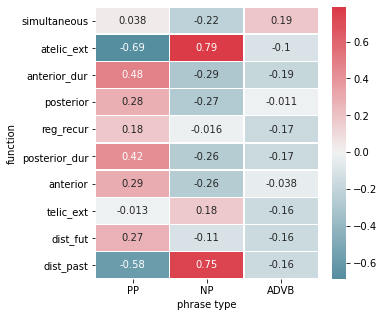

In [22]:
fig,ax = plt.subplots(figsize=(5,5))
heatmap(funcpt_dp, ax=ax, annot=True, square=False)
ax.set_xlabel('phrase type')

out.plot(
    'heat_funcphtype',
)

## Main Function Modifiers

In [23]:
afmod_ct = pivot_ct(
    df_main,
    'function',
    'modtag',
)

afmod_ct = afmod_ct.loc[:, afmod_ct.sum() > 10]

out.table(
    afmod_ct.iloc[:,:10],
    'afmod_ct',
    caption='Top Ten Modifier Counts by Function',
    adjustbox=True,
)

modtag         DEF  DEMON    C  NUM+PL  NUM  ORDN  SFX  PL+C  PL+DEMON  KL+DEF
function                                                                      
simultaneous   430    352  214       2   22   146   29    45        40       0
atelic_ext       2      0    6     162  117     0    0     2         1      55
anterior_dur    62     69   24       0    4     3    0     4         2       0
posterior        4      1   15      15    9     0   40     1        12       0
reg_recur       26      0    3       2    1     0    0     0         0       0
posterior_dur    4      3    0       0    1     1    0    10         0       0
telic_ext        0      0    0       2   10     0    0     0         0       0
anterior         1      0    0       0    0     0    9     0         1       0
dist_fut         0      0    0       5    1     0    0     0         0       0

In [24]:
afmod_pr = afmod_ct.div(afmod_ct.sum(1), 0)
afmod_pc = afmod_pr.mul(100).round().astype(int).astype(str)+'%'

out.table(
    afmod_pc.iloc[:,:10],
    'afmod_pc',
    caption='Modifier Percent of Function (Top Ten)',
    adjustbox=True
)

modtag         DEF DEMON    C NUM+PL  NUM ORDN  SFX PL+C PL+DEMON KL+DEF
function                                                                
simultaneous   32%   26%  16%     0%   2%  11%   2%   3%       3%     0%
atelic_ext      0%    0%   1%    34%  25%   0%   0%   0%       0%    12%
anterior_dur   36%   41%  14%     0%   2%   2%   0%   2%       1%     0%
posterior       4%    1%  14%    14%   8%   0%  37%   1%      11%     0%
reg_recur      43%    0%   5%     3%   2%   0%   0%   0%       0%     0%
posterior_dur  17%   12%   0%     0%   4%   4%   0%  42%       0%     0%
telic_ext       0%    0%   0%    17%  83%   0%   0%   0%       0%     0%
anterior        8%    0%   0%     0%   0%   0%  75%   0%       8%     0%
dist_fut        0%    0%   0%    71%  14%   0%   0%   0%       0%     0%

In [25]:
afmod_dp = sig.apply_deltaP(afmod_ct, 0, 1)

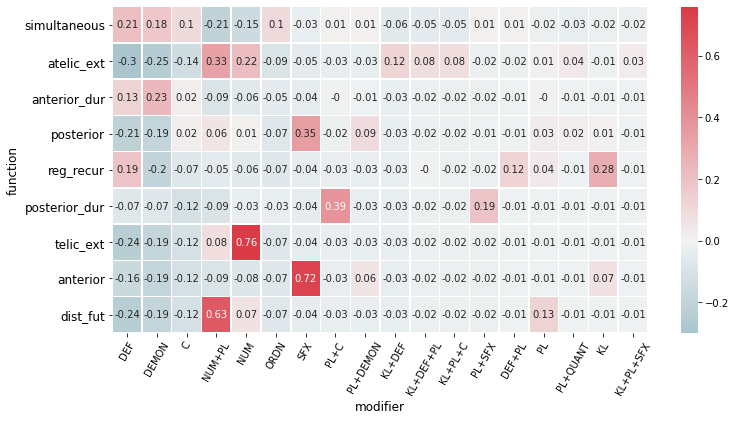

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
heatmap(afmod_dp.round(2), square=False, ax=ax, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.set_yticklabels(ax.get_yticklabels(), size=12)
ax.set_ylabel('function', size=12)
ax.set_xlabel('modifier', size=12)

out.plot(
    'heat_afmod_dp',
)

## Export Modifier ΔPs

### Reg. Recurrence

In [27]:
out.number(
    afmod_dp.loc['reg_recur']['KL']*100,
    'regrec_DP_KL'
)

'28'

In [28]:
out.number(
    afmod_dp.loc['reg_recur']['DEF']*100,
    'regrec_DP_DEF'
)

'19'

# Export All Fronts

In [30]:
abbrevs = {
    'simultaneous': ['sim', 'Simultaneous'],
    'anterior_dur': ['antdur', 'Anterior Durative'],
    'anterior': ['ant', 'Anterior'],
    'atelic_ext': ['atel', 'Atelic Extent'],
    'habitual': ['hab', 'Habitual'],
    'posterior': ['post', 'Posterior'],
    'posterior_dur': ['postdur', 'Posterior Durative'],
    'telic_ext': ['telic', 'Telic Extent'],
    'dist_fut': ['distfut', 'Distance Future'],  
    'dist_past': ['distpast', 'Distance Past'], 
}

funct2data = {}

for function, namedata in abbrevs.items():
    abbrev, full = namedata
    funct_df = df_main[df_main.function == function]
    front_cts = pd.DataFrame(
        funct_df['front'].value_counts()
    )
    front_cts = front_cts.rename_axis(index='front').set_axis(['count'], 1)
    front_prs = front_cts / front_cts.sum()
    front_cp = join_ct_pr(front_cts, front_prs)
    
    funct2data[function] = {
        'df': funct_df,
        'ct':front_cts,
        'pr':front_prs,
        'cp':front_cp,
    }
    
    print(function)
    display(
        out.table(
            front_cp,
            f'{abbrev}_front',
            caption=f'Attested {full} Forms in Sample',
            hebaxis=0,
        )
    )

simultaneous


count percent
front                                    
\texthebrew{בְּ}             1015     54%
\texthebrew{עַתָּה}           349     19%
\texthebrew{Ø}                293     16%
\texthebrew{אָז}               64      3%
\texthebrew{לְ}                43      2%
\texthebrew{כְּ}               35      2%
\texthebrew{מָחָר}             32      2%
\texthebrew{בְּ+אַחֲרִית}      15      1%
\texthebrew{בַּיִן}             7      0%
\texthebrew{לְ+קֵץ}             5      0%
\texthebrew{יֹומָם}             5      0%
\texthebrew{אֶמֶשׁ}             4      0%
\texthebrew{חֲצֹות}             2      0%
\texthebrew{עַל}                2      0%
\texthebrew{כְּ+מִן}            1      0%
\texthebrew{אַחֲרֹון}           1      0%
\texthebrew{אֶל}                1      0%
\texthebrew{רֶגַע}              1      0%
\texthebrew{בְּ+תְּחִלָּה}      1      0%
\texthebrew{רֹאשׁ}              1      0%
\texthebrew{אֶתְמֹול}           1      0%
\texthebrew{בְּ+רֹאשׁ}          1      0%
\texthebrew{בְּ+תָּוֶךְ}        1      0%
\texthebrew{תְּמֹול}            1      0%
\texthebrew{כְּ+חֲצֹות}         1      0%

anterior_dur


count percent
front                             
\texthebrew{עַד}       292     65%
\texthebrew{לְ}        154     34%
\texthebrew{עַד+לְ}      3      1%

anterior


count percent
front                                    
\texthebrew{לְ}                19     59%
\texthebrew{לְ+פָּנֶה}          8     25%
\texthebrew{טֶרֶם}              4     12%
\texthebrew{לְ+פָּנֶה+מִן}      1      3%

atelic_ext


count percent
front                               
\texthebrew{Ø}           523     90%
\texthebrew{תָּמִיד}      31      5%
\texthebrew{יֹומָם}       13      2%
\texthebrew{לְ}            5      1%
\texthebrew{כְּ}           2      0%
\texthebrew{אֵת}           2      0%
\texthebrew{נֵצַח}         1      0%
\texthebrew{רְבִיעִי}      1      0%

habitual


Empty DataFrame
Columns: [count, percent]
Index: []

posterior


count percent
front                                
\texthebrew{אַחַר}        161     72%
\texthebrew{מִן}           32     14%
\texthebrew{מִן+קֵץ}       18      8%
\texthebrew{מִן+קָצֶה}     10      4%
\texthebrew{מִן+אַחַר}      2      1%
\texthebrew{מִן+קְצָת}      1      0%

posterior_dur


count percent
front                                    
\texthebrew{מִן}               64     96%
\texthebrew{מִן+תְּחִלָּה}      1      1%
\texthebrew{מִן+לְ}             1      1%
\texthebrew{לְ+מִן}             1      1%

telic_ext


count percent
front                          
\texthebrew{בְּ}      8     57%
\texthebrew{Ø}        6     43%

dist_fut


count percent
front                          
\texthebrew{בְּ}      6     86%
\texthebrew{Ø}        1     14%

dist_past


count percent
front                        
\texthebrew{Ø}      3    100%

## Export Numbers / Data

### Simultaneous

In [31]:
simdf = funct2data['simultaneous']['df']

In [33]:
out.number(
    funct2data['simultaneous']['pr'].loc['בְּ'][0]*100,
    'perc_sim_B'
)

'54'

In [42]:
# examples with B
out.examples(
    simdf[
        (simdf.front == 'בְּ')
    ].sample(5, random_state=40),
    'B_sim_exs',
)

verse                                             clause
node                                                                  
514859  2 Chr 29:19  אֲשֶׁ֣ר הִזְנִיחַ֩ הַמֶּ֨לֶךְ אָחָ֧ז בְּמַלְכו...
479819    Jer 51:46                   וּבָ֧א בַשָּׁנָ֣ה הַשְּׁמוּעָ֗ה 
451068   Josh 24:25  וַיִּכְרֹ֨ת יְהֹושֻׁ֧עַ בְּרִ֛ית לָעָ֖ם בַּיֹּ...
467037   2 Kgs 17:6  בִּשְׁנַ֨ת הַתְּשִׁיעִ֜ית לְהֹושֵׁ֗עַ לָכַ֤ד מ...
471042    Isa 37:30             וּבַשָּׁנָ֣ה הַשְּׁלִישִׁ֗ית זִרְע֧וּ

In [43]:
# examples with B
out.examples(
    simdf[
        (simdf.front == 'בְּ+אַחֲרִית')
    ].sample(5, random_state=40),
    'Blast_sim_exs',
)

verse                                             clause
node                                                                 
433315    Gen 49:1  אֵ֛ת אֲשֶׁר־יִקְרָ֥א אֶתְכֶ֖ם בְּאַחֲרִ֥ית הַי...
507186    Dan 8:19       אֵ֥ת אֲשֶׁר־יִהְיֶ֖ה בְּאַחֲרִ֣ית הַזָּ֑עַם 
507198    Dan 8:23  וּֽבְאַחֲרִית֙ מַלְכוּתָ֔ם יַעֲמֹ֛ד מֶ֥לֶךְ עַ...
507427   Dan 10:14  אֵ֛ת אֲשֶׁר־יִקְרָ֥ה לְעַמְּךָ֖ בְּאַחֲרִ֣ית ה...
448374  Deut 31:29  וְקָרָ֨את אֶתְכֶ֤ם הָֽרָעָה֙ בְּאַחֲרִ֣ית הַיּ...

In [34]:
get = 'Ø'
out.number(
    funct2data['simultaneous']['pr'].loc[get][0]*100,
    'perc_sim_Ø'
)

'16'

In [35]:
nulldef_ct = simdf[simdf.front == 'Ø'].DEF.value_counts()
nulldef_pr = nulldef_ct / nulldef_ct.sum()

nulldef_pr

1.0    0.83959
0.0    0.16041
Name: DEF, dtype: float64

In [36]:
out.number(
    nulldef_pr[1]*100,
    'nulldef_pr'
)

'84'

#

In [37]:
null_nodef = simdf[
    (simdf.front == 'Ø')
    & (simdf.DEF == 0)
]

out.number(
    null_nodef.shape[0],
    'n_null_nodef'
)

ts.show(
    null_nodef
, extra=['function', 'times_utf8'], spread=10)

showing 10 of 47


In [47]:
# exs with null + H
out.examples(
    simdf[
        (simdf.front == 'Ø')
        & (simdf.DEF == 1)
    ].sample(6, random_state=42069),
    'ØH_sim_exs'
)

verse                                             clause
node                                                                  
460317   2 Sam 19:7                       כִּ֣י׀ הִגַּ֣דְתָּ הַיֹּ֗ום 
432084     Gen 40:7            מַדּ֛וּעַ פְּנֵיכֶ֥ם רָעִ֖ים הַיֹּֽום׃ 
463070  1 Kgs 13:11  אֲשֶׁר־עָשָׂה֩ אִישׁ־הָאֱלֹהִ֨ים׀ הַיֹּ֜ום בְּ...
460277  2 Sam 18:31    כִּֽי־שְׁפָטְךָ֤ יְהוָה֙ הַיֹּ֔ום מִיַּ֖ד כָּל־
454845   1 Sam 9:12                      כִּ֤י הַיֹּום֙ בָּ֣א לָעִ֔יר 
433168    Gen 47:23  הֵן֩ קָנִ֨יתִי אֶתְכֶ֥ם הַיֹּ֛ום וְאֶת־אַדְמַת...

In [49]:
# exs with null + night
out.examples(
    simdf[
        (simdf.front == 'Ø')
        & (simdf.DEF == 0)
        & (simdf.times_etcbc == 'LJLH/')
    ].sample(5, random_state=42069),
    'Ønight_sim_exs'
)

verse                                        clause
node                                                            
461688  1 Kgs 3:19  וַיָּ֛מָת בֶּן־הָאִשָּׁ֥ה הַזֹּ֖את לָ֑יְלָה 
457590  1 Sam 28:8          וַיָּבֹ֥אוּ אֶל־הָאִשָּׁ֖ה לָ֑יְלָה 
491085     Ps 22:3                                  וְ֝לַ֗יְלָה 
499473   Job 30:17           לַ֗יְלָה עֲ֭צָמַי נִקַּ֣ר מֵעָלָ֑י 
443417   Num 22:20  וַיָּבֹ֨א אֱלֹהִ֥ים׀ אֶל־בִּלְעָם֮ לַיְלָה֒

In [51]:
# exs with null + night
out.examples(
    simdf[
        (simdf.front == 'Ø')
        & (simdf.DEF == 0)
        & (simdf.times_etcbc.isin(['JWM/', 'BQR=/']))
    ].sample(5, random_state=42069),
    'Ødaymorn_sim_exs'
)

verse                                             clause
node                                                               
488055  Mic 7:11                       יֹ֥ום הַה֖וּא יִרְחַק־חֹֽק׃ 
490340    Ps 5:4                        בֹּ֖קֶר תִּשְׁמַ֣ע קֹולִ֑י 
485909   Hos 7:6           בֹּ֕קֶר ה֥וּא בֹעֵ֖ר כְּאֵ֥שׁ לֶהָבָֽה׃ 
485905   Hos 7:5  יֹ֣ום מַלְכֵּ֔נוּ הֶחֱל֥וּ שָׂרִ֖ים חֲמַ֣ת מִי...
490341    Ps 5:4                          בֹּ֥קֶר אֶֽעֱרָךְ־לְ֝ךָ֗

In [52]:
nndef_timects = null_nodef.times_utf8.value_counts()
nndef_timeprs = nndef_timects / nndef_timects.sum()

nndef_timects

לַיְלָה       31
יֹום           5
בֹּקֶר         3
עֵת            2
רֶגַע|יֹום     1
מָחָר|עֵת      1
חֹדֶשׁ         1
צָהֳרַיִם      1
שָׁנָה         1
רֶגַע          1
Name: times_utf8, dtype: int64

In [54]:
out.number(
    nndef_timeprs[
        'לַיְלָה'
    ]*100,
    'nndef_night_pr',
)

'66'

In [55]:
out.number(
    nndef_timects['לַיְלָה'],
    'nndef_night_ct',
)

'31'

In [57]:
out.number(
    nndef_timects['יֹום'],
    'nndef_day_ct',
)

'5'

In [58]:
out.number(
    nndef_timects['בֹּקֶר'],
    'nndef_morning_ct',
)

'3'

In [61]:
out.examples(
    simdf[simdf.verse == 'Gen 14:4'],
    'sim_gen14_4'
)

verse                                  clause
node                                                    
428652  Gen 14:4  וּשְׁלֹשׁ־עֶשְׂרֵ֥ה שָׁנָ֖ה מָרָֽדוּ׃

In [65]:
assorted = [
'חֲצֹות',
'יֹומָם',
'אַחֲרֹון',
'רֹאשׁ',
]

out.examples(
    simdf[simdf.front.isin(assorted)].sort_values(by='front').head(5),
    'simassorted_exs'
)

verse                                         clause
node                                                            
498816  Job 19:25              וְ֝אַחֲרֹ֗ון עַל־עָפָ֥ר יָקֽוּם׃ 
496291  Ps 119:62                      חֲצֹֽות־לַ֗יְלָה אָ֭קוּם 
499821  Job 34:20           וַחֲצֹ֪ות לָ֥יְלָה יְגֹעֲשׁ֣וּ עָ֣ם 
451807  Judg 6:27                            מֵעֲשֹׂ֥ות יֹומָ֖ם 
481047  Ezek 12:7  כֵּ֠לַי הֹוצֵ֜אתִי כִּכְלֵ֤י גֹולָה֙ יֹומָ֔ם

In [66]:
simul_L = simdf[simdf.front == 'לְ']

out.number(
    simul_L.shape[0],
    'n_simul_L'
)

'43'

In [71]:
out.examples(
    simul_L.sample(10, random_state=69),
    'Lsim_exs',
)

verse                                             clause
node                                                                  
486027      Hos 9:5                            וּלְיֹ֖ום חַג־יְהוָֽה׃ 
505645    Esth 5:12  וְגַם־לְמָחָ֛ר אֲנִ֥י קָֽרוּא־לָ֖הּ עִם־הַמֶּֽ...
429008    Gen 18:14      לַמֹּועֵ֞ד אָשׁ֥וּב אֵלֶ֛יךָ כָּעֵ֥ת חַיָּ֖ה 
492546     Ps 49:15           וַיִּרְדּ֘וּ בָ֤ם יְשָׁרִ֨ים׀ לַבֹּ֗קֶר 
428156     Gen 7:10                  וַֽיְהִ֖י לְשִׁבְעַ֣ת הַיָּמִ֑ים 
434327     Exod 8:5  לְמָתַ֣י׀ אַעְתִּ֣יר לְךָ֗ וְלַעֲבָדֶ֨יךָ֙ וּֽ...
513859  2 Chr 18:34                                  וַיָּ֕מָת לְעֵ֖ת 
458967   2 Sam 11:2                         וַיְהִ֣י׀ לְעֵ֣ת הָעֶ֗רֶב 
512332  1 Chr 29:21  וַיַּעֲל֨וּ עֹלֹ֜ות לַיהוָ֗ה לְֽמָחֳרַת֮ הַיֹּ...
434388    Exod 8:19                 לְמָחָ֥ר יִהְיֶ֖ה הָאֹ֥ת הַזֶּֽה׃

In [83]:
siml_head_ct = simul_L.times_utf8.value_counts()
siml_head_pr = siml_head_ct / siml_head_ct.sum()
siml_head_cp = join_ct_pr(siml_head_ct, siml_head_pr)

out.table(
    siml_head_cp,
    'siml_head_cp', 
    caption='Semantic Heads of Simultaneous \texthebrew{לְ} Adverbials',
)

count percent
עֵת                9     21%
יֹום               8     19%
מֹועֵד             3      7%
מֹועֵד|עֵת         3      7%
תְּשׁוּבָה         3      7%
עֶרֶב              3      7%
מָחָר              3      7%
מָחֳרָת            2      5%
תְּקוּפָה          2      5%
מֹועֵד|שָׁנָה      1      2%
בֹּקֶר             1      2%
מָתַי              1      2%
עֵת|צָרָה          1      2%
רוּחַ              1      2%
אַחֲרִית           1      2%
רִאשֹׁון           1      2%

In [80]:
out.examples(
    simul_L[simul_L.head_utf8 == 'יום'],
    'Lday_sim',
)

verse                                 clause
node                                                    
428156   Gen 7:10      וַֽיְהִ֖י לְשִׁבְעַ֣ת הַיָּמִ֑ים 
468896   Isa 10:3  וּמַֽה־תַּעֲשׂוּ֙ לְיֹ֣ום פְּקֻדָּ֔ה 
486026    Hos 9:5       מַֽה־תַּעֲשׂ֖וּ לְיֹ֣ום מֹועֵ֑ד 
486027    Hos 9:5                וּלְיֹ֖ום חַג־יְהוָֽה׃ 
490180   Mal 3:17      וְהָ֣יוּ לִ֗י לַיֹּ֕ום סְגֻלָּ֑ה 
498980  Job 21:30   כִּ֤י לְיֹ֣ום אֵ֭יד יֵחָ֣שֶׂךְ רָ֑ע 
498981  Job 21:30          לְיֹ֖ום עֲבָרֹ֣ות יוּבָֽלוּ׃ 
500932  Prov 7:20    לְיֹ֥ום הַ֝כֵּ֗סֶא יָבֹ֥א בֵיתֹֽו׃

In [85]:
out.examples(
    simdf[simdf.front == 'לְ+קֵץ'],
    'Lend_sim',
)

verse                                             clause
node                                                                 
507494    Dan 11:6                   וּלְקֵ֤ץ שָׁנִים֙ יִתְחַבָּ֔רוּ 
507529   Dan 11:13  וּלְקֵ֨ץ הָֽעִתִּ֤ים שָׁנִים֙ יָ֣בֹוא בֹ֔וא בּ...
507726   Dan 12:13         וְתַעֲמֹ֥ד לְגֹרָלְךָ֖ לְקֵ֥ץ הַיָּמִֽין׃ 
509735    Neh 13:6   וּלְקֵ֥ץ יָמִ֖ים נִשְׁאַ֥לְתִּי מִן־הַמֶּֽלֶךְ׃ 
513686  2 Chr 18:2  וַיֵּרֶד֩ לְקֵ֨ץ שָׁנִ֤ים אֶל־אַחְאָב֙ לְשֹׁ֣מ...

#### bayin

In [97]:
out.examples(
    simdf[simdf.front == 'בַּיִן'].sample(3, random_state=69).sort_index(),
    'simbetween_exs',
)

verse                                             clause
node                                                                 
434754   Exod 12:6  וְשָׁחֲט֣וּ אֹתֹ֗ו כֹּ֛ל קְהַ֥ל עֲדַֽת־יִשְׂרָ...
436689  Exod 29:39  וְאֵת֙ הַכֶּ֣בֶשׂ הַשֵּׁנִ֔י תַּעֲשֶׂ֖ה בֵּ֥ין...
436732   Exod 30:8  בְהַעֲלֹ֨ת אַהֲרֹ֧ן אֶת־הַנֵּרֹ֛ת בֵּ֥ין הָעֲר...

**<L**

In [99]:
out.examples(
    simdf[simdf.front == 'עַל'],
    'uponsim_exs'
)

verse                                             clause
node                                                                 
457163  1 Sam 25:8                     כִּֽי־עַל־יֹ֥ום טֹ֖וב בָּ֑נוּ 
509657   Neh 12:22  וְהַכֹּ֣הֲנִ֔ים עַל־מַלְכ֖וּת דָּרְיָ֥וֶשׁ הַפ...

In [100]:
out.examples(
    simdf[simdf.front == 'אֶל'],
    'el_sim_exs',
)

verse                                             clause
node                                                                  
460937  2 Sam 23:13  וַיָּבֹ֤אוּ אֶל־קָצִיר֙ אֶל־דָּוִ֔ד אֶל־מְעָרַ...

In [79]:
ts.show(
    simdf[simdf.front == 'רֶגַע']
)

showing 1 of 1


### Anterior

In [101]:
antdf = df_main[df_main.function == 'anterior']

In [102]:
funct2data['anterior']['ct']

count
front               
לְ                19
לְ+פָּנֶה          8
טֶרֶם              4
לְ+פָּנֶה+מִן      1

In [114]:
lpnj_sffx =     antdf[
        (antdf.SFX == 1)
        & (antdf.times_POS == 'PREP')
    ]

out.examples(
    lpnj_sffx,
    'antsffx_exs'
    
)

verse                                           clause
node                                                                
430797    Gen 30:30                    אֲשֶׁר־הָיָ֨ה לְךָ֤ לְפָנַי֙ 
434635   Exod 10:14   לְ֠פָנָיו לֹא־הָ֨יָה כֵ֤ן אַרְבֶּה֙ כָּמֹ֔הוּ 
461659   1 Kgs 3:12        אֲשֶׁ֤ר כָּמֹ֨וךָ֙ לֹא־הָיָ֣ה לְפָנֶ֔יךָ 
467924  2 Kgs 23:25        וְכָמֹהוּ֩ לֹֽא־הָיָ֨ה לְפָנָ֜יו מֶ֗לֶךְ 
504486     Eccl 9:1  אֵ֤ין יֹודֵ֨עַ֙ הָֽאָדָ֔ם הַכֹּ֖ל לִפְנֵיהֶֽם׃

In [115]:
out.number(
    lpnj_sffx.shape[0],
    'N_LPNJ_sffx'
)

'5'

In [194]:
out.examples(
    antdf[
        (antdf.times_POS != 'PREP')
        & (antdf.times_etcbc != 'PNH/')
    ].sample(5, random_state=42),
    'ant_gp_exs'
)

verse                                             clause
node                                                                 
509787   Neh 13:19  כַּאֲשֶׁ֣ר צָֽלֲלוּ֩ שַׁעֲרֵ֨י יְרוּשָׁלִַ֜ם ל...
430258   Gen 27:10   בַּעֲבֻ֛ר אֲשֶׁ֥ר יְבָרֶכְךָ֖ לִפְנֵ֥י מֹותֹֽו׃ 
498056    Job 8:16                     רָטֹ֣ב ה֖וּא לִפְנֵי־שָׁ֑מֶשׁ 
430247    Gen 27:7  וַאֲבָרֶכְכָ֛ה לִפְנֵ֥י יְהוָ֖ה לִפְנֵ֥י מֹותִ...
511707  1 Chr 22:5       וַיָּ֧כֶן דָּוִ֛יד לָרֹ֖ב לִפְנֵ֥י מֹותֹֽו׃

In [121]:
out.examples(
    antdf[
        (antdf.times_etcbc == 'PNH/')
        & (antdf.unmodified==1)
    ].sample(5, random_state=42).sort_index(),
    'ant_formerly_exs'
)

verse                                             clause
node                                                                 
445097   Deut 2:10  הָאֵמִ֥ים לְפָנִ֖ים יָ֣שְׁבוּ בָ֑הּ עַ֣ם גָּדֹ...
450227  Josh 15:15          וְשֵׁם־דְּבִ֥ר לְפָנִ֖ים קִרְיַת־סֵֽפֶר׃ 
454822   1 Sam 9:9   לְפָנִ֣ים׀ בְּיִשְׂרָאֵ֗ל כֹּֽה־אָמַ֤ר הָאִישׁ֙ 
503225    Ruth 4:7  וְזֹאת֩ לְפָנִ֨ים בְּיִשְׂרָאֵ֜ל עַל־הַגְּאוּל...
509731    Neh 13:5  וְשָׁ֣ם הָי֪וּ לְפָנִ֟ים נֹ֠תְנִים אֶת־הַמִּנְ...

In [110]:
antdf.modtag.value_counts()

SFX         9
DEF         1
PL+DEMON    1
KL          1
Name: modtag, dtype: int64

In [122]:
out.examples(
    antdf[antdf.times_etcbc == 'VRM/'],
    'ant_VRM_exs'
)

verse                                             clause
node                                                                
427693    Gen 2:5  וְכֹ֣ל׀ שִׂ֣יחַ הַשָּׂדֶ֗ה טֶ֚רֶם יִֽהְיֶ֣ה בָ...
427694    Gen 2:5          וְכָל־עֵ֥שֶׂב הַשָּׂדֶ֖ה טֶ֣רֶם יִצְמָ֑ח 
434600  Exod 10:7                                  הֲטֶ֣רֶם תֵּדַ֔ע 
448860   Josh 2:8                              טֶ֣רֶם יִשְׁכָּב֑וּן

In [126]:
antdf[antdf.front.str.startswith('לְ+פָּנֶה')].modtag2.value_counts()

SFX         4
Ø           2
PL+DEMON    1
DEF         1
KL          1
Name: modtag2, dtype: int64

In [127]:
ts.show(
    antdf[
        (antdf.front.str.startswith('לְ+פָּנֶה'))
        & (antdf.modtag2 == 'SFX')
    ]
)

showing 4 of 4


In [128]:
ts.show(
    antdf[
        (antdf.front.str.startswith('לְ+פָּנֶה'))
        & (antdf.modtag2 == 'Ø')
    ]
)

showing 2 of 2


In [129]:
ts.show(
    antdf[
        (antdf.front.str.startswith('לְ+פָּנֶה'))
        & (antdf.modtag2 == 'KL')
    ]
)

showing 1 of 1


In [130]:
ts.show(
    antdf[
        (antdf.front.str.startswith('לְ+פָּנֶה'))
        & (antdf.modtag2 == 'PL+DEMON')
    ]
)

showing 1 of 1


In [131]:
ts.show(
    antdf[
        (antdf.front.str.startswith('לְ+פָּנֶה'))
        & (antdf.modtag2 == 'DEF')
    ]
)

showing 1 of 1


### Posterior

In [132]:
postdf = funct2data['posterior']['df']

In [133]:
postmod_ct = postdf.modtag2.value_counts()

postmod_ct

Ø           111
SFX          40
NUM+PL       15
C            15
PL+DEMON     12
NUM           9
PL            5
DEF           4
PL+QUANT      3
KL            2
DEMON         1
PL+C          1
PL+SFX        1
QUANT+PL      1
KL+SFX        1
Name: modtag2, dtype: int64

In [135]:
single_sfx = postdf[
        (postdf.SFX == 1)
        & (postdf.n_slots == 1)
]

out.number(
    single_sfx.shape[0],
    'N_singpost_sfx'
)

out.number(
    100*(single_sfx.shape[0] / postdf.shape[0]),
    'pc_singpost_sfx'
)

out.examples(
    single_sfx.sample(6, random_state=42).sort_index(),
    'post_sfx_exs'
)

verse                                             clause
node                                                                  
457117  1 Sam 24:22             אִם־תַּכְרִ֥ית אֶת־זַרְעִ֖י אַֽחֲרָ֑י 
461660   1 Kgs 3:12               וְאַחֲרֶ֖יךָ לֹא־יָק֥וּם כָּמֹֽוךָ׃ 
508760     Neh 3:17  אַחֲרָ֛יו הֶחֱזִ֥יקוּ הַלְוִיִּ֖ם רְח֣וּם בֶּן...
508765     Neh 3:20                                אַחֲרָ֨יו הֶחֱרָ֧ה 
508783     Neh 3:29  וְאַחֲרָ֤יו הֶחֱזִיק֙ שְׁמַֽעְיָ֣ה בֶן־שְׁכַנְ...
513278  2 Chr 11:16  וְאַחֲרֵיהֶ֗ם מִכֹּל֙ שִׁבְטֵ֣י יִשְׂרָאֵ֔ל ב֚...

In [137]:
single_post =     postdf[
        (postdf.modtag2 == 'Ø')
        & (postdf.n_slots == 1)
    ]

out.number(
    single_post.shape[0],
    'N_single_post'
)


out.number(
    100*(single_post.shape[0] / postdf.shape[0]),
    'pc_singpost'
)

out.examples(
    single_post.sample(6, random_state=42).sort_index(),
    'post_single_exs',
)

verse                                  clause
node                                                     
439271  Lev 14:19       וְאַחַ֖ר יִשְׁחַ֥ט אֶת־הָעֹלָֽה׃ 
443010   Num 19:7      וְאַחַ֖ר יָבֹ֣וא אֶל־הַֽמַּחֲנֶ֑ה 
448901  Josh 2:16      וְאַחַ֖ר תֵּלְכ֥וּ לְדַרְכְּכֶֽם׃ 
453492  Judg 19:5                    וְאַחַ֥ר תֵּלֵֽכוּ׃ 
485700    Hos 3:5  אַחַ֗ר יָשֻׁ֨בוּ֙ בְּנֵ֣י יִשְׂרָאֵ֔ל 
493800   Ps 73:24       וְ֝אַחַ֗ר כָּבֹ֥וד תִּקָּחֵֽנִי׃

In [140]:
out.examples(
    postdf[
        (postdf['front'] == 'מִן')
        & (postdf.times_etcbc == 'MXRT/')
    ].sample(5, random_state=42).sort_index(),
    'post_MXRT_exs'
)

verse                                             clause
node                                                                  
429260    Gen 19:34                            וַֽיְהִי֙ מִֽמָּחֳרָ֔ת 
434446     Exod 9:6  וַיַּ֨עַשׂ יְהוָ֜ה אֶת־הַדָּבָ֤ר הַזֶּה֙ מִֽמּ...
442859    Num 17:23                             וַיְהִ֣י מִֽמָּחֳרָ֗ת 
456230  1 Sam 18:10                             וַיְהִ֣י מִֽמָּחֳרָ֗ת 
457933   1 Sam 31:8                            וַֽיְהִי֙ מִֽמָּחֳרָ֔ת

In [142]:
out.examples(
    postdf[
        postdf.verse.isin(['Lev 27:17', 'Isa 24:22', 'Ezek 38:8', 'Hos 6:2'])
    ],
    'postMN_nondur_exs'
)

verse                                           clause
node                                                              
440881  Lev 27:17  אִם־מִשְּׁנַ֥ת הַיֹּבֵ֖ל יַקְדִּ֣ישׁ שָׂדֵ֑הוּ 
469913  Isa 24:22                   וּמֵרֹ֥ב יָמִ֖ים יִפָּקֵֽדוּ׃ 
484355  Ezek 38:8                  מִיָּמִ֣ים רַבִּים֮ תִּפָּקֵד֒ 
485852    Hos 6:2                         יְחַיֵּ֖נוּ מִיֹּמָ֑יִם

In [145]:
out.examples(
    postdf[postdf['front'] == 'מִן+קֵץ'].sample(5, random_state=42).sort_index(),
    'post_MQC_exs'
)

verse                                             clause
node                                                                  
427887      Gen 4:3                         וַֽיְהִ֖י מִקֵּ֣ץ יָמִ֑ים 
428205      Gen 8:6              וַֽיְהִ֕י מִקֵּ֖ץ אַרְבָּעִ֣ים יֹ֑ום 
432145     Gen 41:1              וַיְהִ֕י מִקֵּ֖ץ שְׁנָתַ֣יִם יָמִ֑ים 
445968    Deut 9:11  מִקֵּץ֙ אַרְבָּעִ֣ים יֹ֔ום וְאַרְבָּעִ֖ים לָ֑י...
459615  2 Sam 14:26             וְֽ֠הָיָה מִקֵּץ֙ יָמִ֤ים׀ לַיָּמִים֙

## Anterior-Durative

In [146]:
antdurdf = funct2data['anterior_dur']['df']

In [149]:
clear_ends = ['MWT/', 'CNH/', 'YHRJM/']

In [150]:
out.examples(
    antdurdf[antdurdf.times_etcbc.isin(clear_ends)],
    'antdur_end_exs',
    spread=5
)

exporting 5 of 15...


verse                                             clause
node                                                                 
440537   Lev 25:22  וַאֲכַלְתֶּ֖ם מִן־הַתְּבוּאָ֣ה יָשָׁ֑ן עַ֣ד׀ ה...
440885   Lev 27:18              הַנֹּ֣ותָרֹ֔ת עַ֖ד שְׁנַ֣ת הַיֹּבֵ֑ל 
444816   Num 35:32          לָשֶׁ֣בֶת בָּאָ֔רֶץ עַד־מֹ֖ות הַכֹּהֵֽן׃ 
468043  2 Kgs 25:2  וַתָּבֹ֥א הָעִ֖יר בַּמָּצֹ֑ור עַ֚ד עַשְׁתֵּ֣י ...
486453    Joel 2:2  וְאַֽחֲרָיו֙ לֹ֣א יֹוסֵ֔ף עַד־שְׁנֵ֖י דֹּ֥ור ו...

In [148]:
antdurdf.times_etcbc.value_counts()

<WLM/        154
JWM/          87
<RB/          43
NYX/          25
MTJ           23
BQR=/         20
<D/           17
>N            13
DWR/|DWR/     10
CNH/           9
<WLM/|<D/      9
<T/            7
HNH==          6
MWT/           5
MH             2
LJLH/          2
KH             2
XDC=/          2
<TH            2
MW<D/          1
DWR/           1
KWN[           1
CMJM/          1
<JLWM/         1
MNXH/          1
ZQNH/          1
>WR/           1
FJBH/          1
KN             1
YHRJM/         1
Name: times_etcbc, dtype: int64

In [165]:
# anterior durative of result

out.examples(
    antdurdf[
        (antdurdf.has_objc == 1)
        & (antdurdf.DEMON == 1)
        & (antdurdf.verbform == 'wayq')
    ],
    'antdur_result_exs',
    spread=10,
)

exporting 10 of 17...


verse                                             clause
node                                                                  
433180    Gen 47:26  וַיָּ֣שֶׂם אֹתָ֣הּ יֹוסֵ֡ף לְחֹק֩ עַד־הַיֹּ֨ום...
449145     Josh 5:9  וַיִּקְרָ֞א שֵׁ֣ם הַמָּקֹ֤ום הַהוּא֙ גִּלְגָּ֔...
449568    Josh 8:28  וַיְשִׂימֶ֤הָ תֵּל־עֹולָם֙ שְׁמָמָ֔ה עַ֖ד הַיּ...
449830   Josh 10:27  וַיָּשִׂ֜מוּ אֲבָנִ֤ים גְּדֹלֹות֙ עַל־פִּ֣י הַ...
458565    2 Sam 6:8  וַיִּקְרָ֞א לַמָּקֹ֤ום הַהוּא֙ פֶּ֣רֶץ עֻזָּ֔ה...
462539   1 Kgs 9:13  וַיִּקְרָ֤א לָהֶם֙ אֶ֣רֶץ כָּב֔וּל עַ֖ד הַיֹּ֥...
466743   2 Kgs 14:7  וַיִּקְרָ֤א אֶת־שְׁמָהּ֙ יָקְתְאֵ֔ל עַ֖ד הַיֹּ...
510197   1 Chr 4:41               וַיַּחֲרִימֻם֙ עַד־הַיֹּ֣ום הַזֶּ֔ה 
510974  1 Chr 13:11  וַיִּקְרָ֞א לַמָּקֹ֤ום הַהוּא֙ פֶּ֣רֶץ עֻזָּ֔א...
513010    2 Chr 8:8  וַיַּעֲלֵ֤ם שְׁלֹמֹה֙ לְמַ֔ס עַ֖ד הַיֹּ֥ום הַז...

In [167]:
# anterior durative of result

out.examples(
    antdurdf[antdurdf.verse.isin(['Josh 4:9', 'Josh 6:25', '2 Kgs 2:22'])],
    'antdur_result_state_exs',
)

verse                                             clause
node                                                                 
449051    Josh 4:9          וַיִּ֣הְיוּ שָׁ֔ם עַ֖ד הַיֹּ֥ום הַזֶּֽה׃ 
449292   Josh 6:25  וַתֵּ֨שֶׁב֙ בְּקֶ֣רֶב יִשְׂרָאֵ֔ל עַ֖ד הַיֹּ֣ו...
464987  2 Kgs 2:22  וַיֵּרָפ֣וּ הַמַּ֔יִם עַ֖ד הַיֹּ֣ום הַזֶּ֑ה כּ...

In [152]:
out.examples(
    df[
        (df.function == 'begin_to_end')
        & (df.lex_str.str.contains('עד'))
    ],
    'antdur_begintoend_exs',
    spread=5,
)

exporting 5 of 44...


verse                                             clause
node                                                                  
433071    Gen 46:34  אַנְשֵׁ֨י מִקְנֶ֜ה הָי֤וּ עֲבָדֶ֨יךָ֙ מִנְּעוּ...
457835  1 Sam 30:17  וַיַּכֵּ֥ם דָּוִ֛ד מֵהַנֶּ֥שֶׁף וְעַד־הָעֶ֖רֶב...
476611     Jer 25:3  מִן־שְׁלֹ֣שׁ עֶשְׂרֵ֣ה שָׁנָ֡ה לְיֹאשִׁיָּ֣הוּ...
496662     Ps 125:2  וַ֭יהוָה סָבִ֣יב לְעַמֹּ֑ו מֵ֝עַתָּ֗ה וְעַד־עֹ...
512275  1 Chr 29:10        בָּר֨וּךְ אַתָּ֤ה מֵעֹולָ֖ם וְעַד־עֹולָֽם׃

In [154]:
out.examples(
    df[
        (df.function == 'begin_to_end')
        & (df.verse.isin(['Isa 34:10', 'Ps 96:2', 'Job 4:20']))
    ],
    'antdur_Lbegintoend_exs',
    spread=5,
)

exporting 3 of 3...


verse                                        clause
node                                                           
470741  Isa 34:10                   מִדֹּ֤ור לָדֹור֙ תֶּחֱרָ֔ב 
495016    Ps 96:2  בַּשְּׂר֥וּ מִיֹּֽום־לְ֝יֹ֗ום יְשׁוּעָתֹֽו׃ 
497794   Job 4:20                מִבֹּ֣קֶר לָעֶ֣רֶב יֻכַּ֑תּוּ

In [160]:
out.examples(
    df[
        (df.lex_str.str.contains('עד'))
        & (df.verse.isin(['Isa 13:20', 'Jer 50:39', 'Ps 49:20', 'Ps 100:5']))
    ],
    'antdur_<D_exs',
    spread=5,
)

exporting 3 of 3...


verse                                   clause
node                                                      
469151  Isa 13:20    וְלֹ֥א תִשְׁכֹּ֖ן עַד־דֹּ֣ור וָדֹ֑ור 
479598  Jer 50:39  וְלֹ֥א תִשְׁכֹּ֖ון עַד־דֹּ֥ור וָדֹֽור׃ 
492561   Ps 49:20         עַד־נֵ֝֗צַח לֹ֣א יִרְאוּ־אֹֽור׃

In [169]:
out.examples(
    antdurdf[antdurdf.book == 'Leviticus'],
    'antdur_Lev_exs',
    spread=5,
)

exporting 5 of 38...


verse                                             clause
node                                                                
438414   Lev 7:15            לֹֽא־יַנִּ֥יחַ מִמֶּ֖נּוּ עַד־בֹּֽקֶר׃ 
439359  Lev 14:46                          וְיִטְמָ֖א עַד־הָעָֽרֶב׃ 
439456  Lev 15:17                          וְטָמֵ֥א עַד־הָעָֽרֶב׃ פ 
439859  Lev 19:13  לֹֽא־תָלִ֞ין פְּעֻלַּ֥ת שָׂכִ֛יר אִתְּךָ֖ עַד־...
440885  Lev 27:18              הַנֹּ֣ותָרֹ֔ת עַ֖ד שְׁנַ֣ת הַיֹּבֵ֑ל

In [170]:
out.examples(
    antdurdf[
        (antdurdf.DEF == 1)
        | (antdurdf.DEMON == 1)
    ],
    'antdur_defdem_exs',
    spread=5,
)

exporting 5 of 138...


verse                                             clause
node                                                                  
428203      Gen 8:5  וְהַמַּ֗יִם הָיוּ֙ הָלֹ֣וךְ וְחָסֹ֔ור עַ֖ד הַח...
439716    Lev 17:15                             וְטָמֵ֥א עַד־הָעֶ֖רֶב 
451194    Judg 1:26           ה֣וּא שְׁמָ֔הּ עַ֖ד הַיֹּ֥ום הַזֶּֽה׃ פ 
466401  2 Kgs 10:27         וַיְשִׂמֻ֥הוּ לְמֹֽוצָאֹ֖ות עַד־הַיֹּֽום׃ 
515582  2 Chr 35:25  וַיֹּאמְר֣וּ כָֽל־הַשָּׁרִ֣ים׀ וְ֠הַשָּׁרֹות ב...

## Posterior Durative

In [175]:
posddf = funct2data['posterior_dur']['df']

In [176]:
out.examples(
    postdurdf[posddf.front == 'לְ+מִן'],
    'LMN_post_ex'
)

verse                                       clause
node                                                        
490132  Mal 3:7  לְמִימֵ֨י אֲבֹתֵיכֶ֜ם סַרְתֶּ֤ם מֵֽחֻקַּי֙

In [178]:
out.examples(
    posddf[
        (posddf.PL == 1)
        & (posddf.times_etcbc == 'JWM/')
    ],
    'postdur_days_ex',
    spread=5,
)

exporting 5 of 10...


verse                                             clause
node                                                                  
461161    1 Kgs 1:6                וְלֹֽא־עֲצָבֹ֨ו אָבִ֤יו מִיָּמָיו֙ 
488181      Nah 2:9       וְנִינְוֵ֥ה כִבְרֵֽכַת־מַ֖יִם מִ֣ימֵי הִ֑יא 
504767      Lam 1:7                     אֲשֶׁ֥ר הָי֖וּ מִ֣ימֵי קֶ֑דֶם 
507928     Ezra 4:2  וְלֹ֣ו ׀ אֲנַ֣חְנוּ זֹבְחִ֗ים מִימֵי֙ אֵסַ֤ר ח...
515543  2 Chr 35:18  וְלֹֽא־נַעֲשָׂ֨ה פֶ֤סַח כָּמֹ֨הוּ֙ בְּיִשְׂרָא...

## Dist Past / Future

In [179]:
distdf = df[df.function.isin(['dist_past', 'dist_fut'])]

In [181]:
out.examples(
    distdf[distdf.function == 'dist_fut'],
    'disfut_exs',
)

verse                                             clause
node                                                                
432107  Gen 40:13  בְּעֹ֣וד׀ שְׁלֹ֣שֶׁת יָמִ֗ים יִשָּׂ֤א פַרְעֹה֙...
432132  Gen 40:19  בְּעֹ֣וד׀ שְׁלֹ֣שֶׁת יָמִ֗ים יִשָּׂ֨א פַרְעֹ֤ה...
448778  Josh 1:11  כִּ֞י בְּעֹ֣וד׀ שְׁלֹ֣שֶׁת יָמִ֗ים אַתֶּם֙ עֹֽ...
468659    Isa 7:8  וּבְעֹ֗וד שִׁשִּׁ֤ים וְחָמֵשׁ֙ שָׁנָ֔ה יֵחַ֥ת ...
470561  Isa 32:10                יָמִים֙ עַל־שָׁנָ֔ה תִּרְגַּ֖זְנָה 
486871   Amos 4:7  וְגַ֣ם אָנֹכִי֩ מָנַ֨עְתִּי מִכֶּ֜ם אֶת־הַגֶּ֗...
507564  Dan 11:20                  וּבְיָמִ֤ים אֲחָדִים֙ יִשָּׁבֵ֔ר

In [182]:
out.examples(
    distdf[distdf.function == 'dist_past'],
    'dispast_exs',
)

verse                                             clause
node                                                                
434026   Exod 5:8         אֲשֶׁ֣ר הֵם֩ עֹשִׂ֨ים תְּמֹ֤ול שִׁלְשֹׁם֙ 
454375  1 Sam 4:7  כִּ֣י לֹ֥א הָיְתָ֛ה כָּזֹ֖את אֶתְמֹ֥ול שִׁלְשׁ...
503000  Ruth 2:11      אֲשֶׁ֥ר לֹא־יָדַ֖עַתְּ תְּמֹ֥ול שִׁלְשֹֽׁום׃

## Regular recurrence

In [183]:
regdf = df[df.function == 'reg_recur'].copy()

In [184]:
regtk_ct = regdf.reg_group.value_counts()
regtk_pr = regtk_ct / regtk_ct.sum()
regtk_cp = join_ct_pr(regtk_ct, regtk_pr)

out.table(
    regtk_cp,
    'regtk_cp',
    caption='Token Frequencies for Regular Recurrance Adverbials'
)

count percent
ל.זמן           21     26%
ב.כל.זמן        18     22%
ב.זמן.ב.זמן     17     21%
זמן.ב.זמן       11     14%
זמן.זמן          8     10%
ל.זמן.ל.זמן      3      4%
זמן.על.זמן       1      1%
בין.זמן          1      1%

In [186]:
out.examples(
    regdf[regdf.reg_group == 'זמן.זמן'],
    'regrec_distr_exs',
    spread=5
)

exporting 5 of 8...


verse                                   clause
node                                                       
431998   Gen 39:10  כְּדַבְּרָ֥הּ אֶל־יֹוסֵ֖ף יֹ֣ום׀ יֹ֑ום 
446539  Deut 14:22   הַיֹּצֵ֥א הַשָּׂדֶ֖ה שָׁנָ֥ה שָׁנָֽה׃ 
493418    Ps 68:20            יֹ֤ום׀ יֹ֥ום יַֽעֲמָס־לָ֗נוּ 
501031   Prov 8:34  לִשְׁקֹ֣ד עַל־דַּ֭לְתֹתַי יֹ֤ום׀ יֹ֑ום 
505438    Esth 3:4       כְּאָמְרָ֤ם אֵלָיו֙ יֹ֣ום וָיֹ֔ום

In [187]:
out.examples(
    regdf[regdf.reg_group == 'ב.זמן.ב.זמן'],
    'regrec_prepdistr_exs',
    spread=5
)

exporting 5 of 17...


verse                                             clause
node                                                                  
435342   Exod 16:21        וַיִּלְקְט֤וּ אֹתֹו֙ בַּבֹּ֣קֶר בַּבֹּ֔קֶר 
440411     Lev 24:8  בְּיֹ֨ום הַשַּׁבָּ֜ת בְּיֹ֣ום הַשַּׁבָּ֗ת יַֽע...
485231    Ezek 46:3  וְהִשְׁתַּחֲו֣וּ עַם־הָאָ֗רֶץ פֶּ֚תַח הַשַּׁ֣ע...
485276   Ezek 46:15  יַעֲשׂ֨וּ אֶת־הַכֶּ֧בֶשׂ וְאֶת־הַמִּנְחָ֛ה וְאֶ...
513411  2 Chr 13:11                      לְבָעֵר֙ בָּעֶ֣רֶב בָּעֶ֔רֶב

In [188]:
out.examples(
    regdf[regdf.reg_group == 'זמן.ב.זמן'],
    'regrec_distrmix_exs',
    spread=5
)

exporting 5 of 11...


verse                                             clause
node                                                                  
446653   Deut 15:20  לִפְנֵי֩ יְהוָ֨ה אֱלֹהֶ֤יךָ תֹאכֲלֶ֨נּוּ֙ שָׁנ...
461882   1 Kgs 5:25  כֹּֽה־יִתֵּ֧ן שְׁלֹמֹ֛ה לְחִירָ֖ם שָׁנָ֥ה בְשׁ...
489911   Zech 14:16                וְעָל֞וּ מִדֵּ֧י שָׁנָ֣ה בְשָׁנָ֗ה 
512076   1 Chr 27:1  הַבָּאָ֤ה חֹ֣דֶשׁ בְּחֹ֔דֶשׁ לְכֹ֖ל חָדְשֵׁ֣י ...
515012  2 Chr 30:22  וַיֹּאכְל֤וּ אֶת־הַמֹּועֵד֙ שִׁבְעַ֣ת הַיָּמִ֔ים

In [189]:
ts.show(
    regdf[regdf.reg_group == 'בין.זמן'],
    extra=['notes']
)

showing 1 of 1


In [190]:
ts.show(
    regdf[regdf.reg_group == 'זמן.על.זמן'],
    extra=['notes']
)

showing 1 of 1


### Do Modifier Counts for Regular Recurrence

In [191]:
regrecmod_ct = pivot_ct(
    regdf,
    'reg_group',
    'modtag2'
)
regrecmod_pr = regrecmod_ct.div(regrecmod_ct.sum(1), 0)
regrecmod_pc = regrecmod_pr.mul(100).round().astype(int).astype(str)+'%'

out.table(
    regrecmod_ct,
    'regrecmod_ct',
    caption='Modifier Frequencies by Reg. Recurrence Patterns',
    adjustbox=True,
)

modtag2      DEF  KL  DEF+PL  C  PL  QUANT  NUM+PL  KL+DEF+PL  NUM  NUM+DEF+PL
reg_group                                                                     
ל.זמן         11   0       4  1   2      0       1          0    1           0
ב.כל.זמן       0  17       0  0   0      0       0          1    0           0
ב.זמן.ב.זמן   14   0       2  1   0      0       0          0    0           0
זמן.ב.זמן      0   0       0  1   0      3       0          0    0           1
ל.זמן.ל.זמן    1   0       2  0   0      0       0          0    0           0
בין.זמן        0   0       0  0   0      0       1          0    0           0
זמן.על.זמן     0   0       0  0   1      0       0          0    0           0

In [192]:
out.table(
    regrecmod_pc,
    'regrecmod_pc',
    caption='Modifier Percentages by Reg. Recurrence Patterns',
    adjustbox=True,
)

modtag2      DEF   KL DEF+PL    C    PL QUANT NUM+PL KL+DEF+PL NUM NUM+DEF+PL
reg_group                                                                    
ל.זמן        55%   0%    20%   5%   10%    0%     5%        0%  5%         0%
ב.כל.זמן      0%  94%     0%   0%    0%    0%     0%        6%  0%         0%
ב.זמן.ב.זמן  82%   0%    12%   6%    0%    0%     0%        0%  0%         0%
זמן.ב.זמן     0%   0%     0%  20%    0%   60%     0%        0%  0%        20%
ל.זמן.ל.זמן  33%   0%    67%   0%    0%    0%     0%        0%  0%         0%
בין.זמן       0%   0%     0%   0%    0%    0%   100%        0%  0%         0%
זמן.על.זמן    0%   0%     0%   0%  100%    0%     0%        0%  0%         0%

## Atelic Extent

In [70]:
ateldf = df[df.function == 'atelic_ext']

In [71]:
ts.show(
    ateldf[ateldf.front == 'ל']
)

showing 5 of 5


In [72]:
out.number(
    ateldf[ateldf.front == 'ל'].shape[0],
    'atelext_ל_N'
)

'5'

In [73]:
# ts.show(
#     df[df.front == 'ל'].sort_values(by='notes'),
#     extra=['notes']
# )

In [74]:
ts.show(
    ateldf[ateldf.front == 'רביעי']
)

showing 1 of 1


In [75]:
# get some purposive extents for illustrating L-atelic ext

ts.show(
    df[df.function == 'purposive_ext']
)

showing 25 of 34


In [76]:
et_atel = ateldf[ateldf.front == 'את']

out.number(
    et_atel.shape[0],
    'atelext_et_N'
)

'2'

In [77]:
K_atel = ateldf[ateldf.front == 'כ']

out.number(
    K_atel.shape[0],
    'atelext_K_N'
)

'2'

In [78]:
ts.show(
    K_atel
)

showing 2 of 2


### Phrase types

In [79]:
abbrevs = {
    'simultaneous': ['sim', 'Simultaneous'],
    'anterior_dur': ['antdur', 'Anterior Durative'],
    'anterior': ['ant', 'Anterior'],
    'atelic_ext': ['atel', 'Atelic Extent'],
    'habitual': ['hab', 'Habitual'],
    'posterior': ['post', 'Posterior'],
    'posterior_dur': ['postdur', 'Posterior Durative'],
    'telic_ext': ['telic', 'Telic Extent'],    
    'dist_fut': ['distfut', 'Distance Future'],  
    'dist_past': ['distpast', 'Distance Past'],  
    'habitual': ['hab', 'Habitual'],
}

for function, namedata in abbrevs.items():
    abbrev, full = namedata
    phtype_cts = pd.DataFrame(
        df_main[df_main.function == function]['ph_type'].value_counts()
    )
    phtype_cts = phtype_cts.rename_axis(index='Phrase Type').set_axis(['count'], 1)
    phtype_prs = phtype_cts / phtype_cts.sum()
    phtype_cp = join_ct_pr(phtype_cts, phtype_prs)
    
    print(function)
    tablename = f'{abbrev}_phtype_ct'
    print(tablename)
    display(
        out.table(
            phtype_cp,
            tablename,
            caption=f'Attested {full} Phrase Types in Sample',
        )
    )
    print('-'*20)

simultaneous
sim_phtype_ct


count percent
Phrase Type               
PP            1131     60%
ADVB           458     24%
NP             293     16%

--------------------
anterior_dur
antdur_phtype_ct


count percent
Phrase Type               
PP             449    100%

--------------------
anterior
ant_phtype_ct


count percent
Phrase Type               
PP              28     88%
ADVB             4     12%

--------------------
atelic_ext
atel_phtype_ct


count percent
Phrase Type               
NP             523     90%
ADVB            46      8%
PP               9      2%

--------------------
habitual
hab_phtype_ct


Empty DataFrame
Columns: [count, percent]
Index: []

--------------------
posterior
post_phtype_ct


count percent
Phrase Type               
PP             190     85%
ADVB            34     15%

--------------------
posterior_dur
postdur_phtype_ct


count percent
Phrase Type               
PP              67    100%

--------------------
telic_ext
telic_phtype_ct


count percent
Phrase Type               
PP               8     57%
NP               6     43%

--------------------
dist_fut
distfut_phtype_ct


count percent
Phrase Type               
PP               6     86%
NP               1     14%

--------------------
dist_past
distpast_phtype_ct


count percent
Phrase Type               
NP               3    100%

--------------------


## Telic Extent

In [80]:
teldf = df[df.function == 'telic_ext']

out.number(
    teldf.shape[0],
    'N_telext'
)

'14'

In [81]:
ts.show(
    teldf, extra=['front', 'modtag2']
)

showing 14 of 14


In [82]:
telext_mod_ct = pivot_ct(
   teldf,
    'front',
    'modtag2'
)


telext_mod_pr = telext_mod_ct.div(telext_mod_ct.sum(1), 0)
telext_mod_pc = telext_mod_pr.mul(100).round().astype(int).astype(str)+'%'

out.table(
    telext_mod_ct,
    'telext_mod_ct',
    caption='Modifier Frequencies for Telic Extent Forms'
)

modtag2  NUM  NUM+PL  NUM+PL+C  QUANT+DEF+PL
front                                       
ב          7       0         0             1
Ø          3       2         1             0

In [83]:
out.table(
    telext_mod_pc,
    'telext_mod_pc',
    caption='Modifier Percentages for Telic Extent Forms'
)

modtag2  NUM NUM+PL NUM+PL+C QUANT+DEF+PL
front                                    
ב        88%     0%       0%          12%
Ø        50%    33%      17%           0%

# Text Examples

## Automatic Examples

In [92]:
exs = {
    'anterior_dur': ['antdur', 'Anterior Durative'],
    'anterior': ['ant', 'Anterior'],
    'posterior': ['post', 'Posterior'],
    'posterior_dur': ['postdur', 'Posterior Durative'],
    'dist_past': ['distpast', 'Distance Past'],
    'dist_fut': ['distfut', 'Distance Future'],

}

for function, namedata in exs.items():
    abbrev, full = namedata
    fronts = funct2data[function]['ct'].index
    print(function)
    for front in fronts:
        print(front)
        exdf = df_main[
            (df_main.function == function)
            & (df_main.front == front)
        ]
        display(
            ts.show(exdf, spread=5, extra=['function', 'front'])
        )
    print('-'*50)

anterior_dur
עד
showing 5 of 292


ל
showing 5 of 154


עד+ל
showing 3 of 3


--------------------------------------------------
anterior
ל+פנה
showing 5 of 27


טרם
showing 4 of 4


ל+פנה+מן
showing 1 of 1


--------------------------------------------------
posterior
אחר
showing 5 of 161


מן
showing 5 of 32


מן+קץ
showing 5 of 18


מן+קצה
showing 5 of 10


מן+אחר
showing 2 of 2


מן+קצת
showing 1 of 1


--------------------------------------------------
posterior_dur
מן
showing 5 of 64


מן+ל
showing 1 of 1


מן+תחלה
showing 1 of 1


ל+מן
showing 1 of 1


--------------------------------------------------
dist_past
Ø
showing 3 of 3


--------------------------------------------------
dist_fut
ב
showing 5 of 6


Ø
showing 1 of 1


--------------------------------------------------
